# Implementing all models 


In [296]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [297]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index


In [316]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.tail()


,Open,High,Low,Close,Adj Close,Volume,days_from_start
Date,,,,,,,
2020-10-12,0.7090,0.7100,0.6500,0.6768,0.6768,48320475.0,6143.0
2020-10-13,0.6768,0.6768,0.6000,0.6006,0.6006,47786200.0,6144.0
2020-10-14,0.6010,0.6400,0.5962,0.6260,0.6260,37534949.0,6145.0
2020-10-15,0.6260,0.6260,0.5850,0.6050,0.6050,26737615.0,6146.0
2020-10-16,0.6050,0.6200,0.6010,0.6106,0.6106,15754218.0,6147.0


In [314]:
df['days_from_start'] = (df.index - df.index[0]).days
X = df['days_from_start'].values.reshape(-1, 1)
y = df['Close'].values
X


array([[   0],
       [   1],
       [   4],
       ...,
       [6145],
       [6146],
       [6147]], dtype=int64)

In [300]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [301]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [302]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(max_depth=100)
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100)

In [303]:

print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))


LinearRegression intercept80.28803066101693
LinearRegression coef[27.7529151]
SGDRegression intercept[80.04743754]
SGDRegression coef[27.19995277]


In [304]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)
Dtree_pred = DTreeModel.predict(X_test)


In [305]:
from sklearn import metrics
print("SGD Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, sgd.predict(X_test)))
print("Score:", sgd.score(X_test, y_test))
print("\nLinear Regressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print("Score:", regressor.score(X_test, y_test))

SGD Regressor
Mean Squared Error : 2321.120392992488
Mean Absolute Error : 36.467556273557854
Score: 0.20502506835837297

Linear Regressor
Mean Absolute Error: 36.420276591070795
Mean Squared Error: 2325.7962434978367
Root Mean Squared Error: 48.22650975861551
Score: 0.20342360729367415


In [306]:
from sklearn import metrics
def ModelScoring(name, model): #pass the name of the model, and the model itself
    print(name)
    print('Mean Squared Error :',metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("Score:", model.score(X_test, y_test))
    print()

In [307]:
ModelScoring("SGD Regressor", sgd)
ModelScoring("Linear Regressor", regressor)
ModelScoring("Decision Tree Regressor", DTreeModel)

SGD Regressor
Mean Squared Error : 2321.120392992488
Mean Absolute Error : 36.467556273557854
Root Mean Squared Error: 48.178007358051744
Score: 0.20502506835837297

Linear Regressor
Mean Squared Error : 2325.7962434978367
Mean Absolute Error : 36.420276591070795
Root Mean Squared Error: 48.22650975861551
Score: 0.20342360729367415

Decision Tree Regressor
Mean Squared Error : 10.493652677901277
Mean Absolute Error : 1.7428265648038046
Root Mean Squared Error: 3.239390788080573
Score: 0.9964059637554903



In [311]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': Dtree_pred})
df2.sort_values(by=Index,inplace=True) 

NameError: name 'Index' is not defined

<AxesSubplot:>

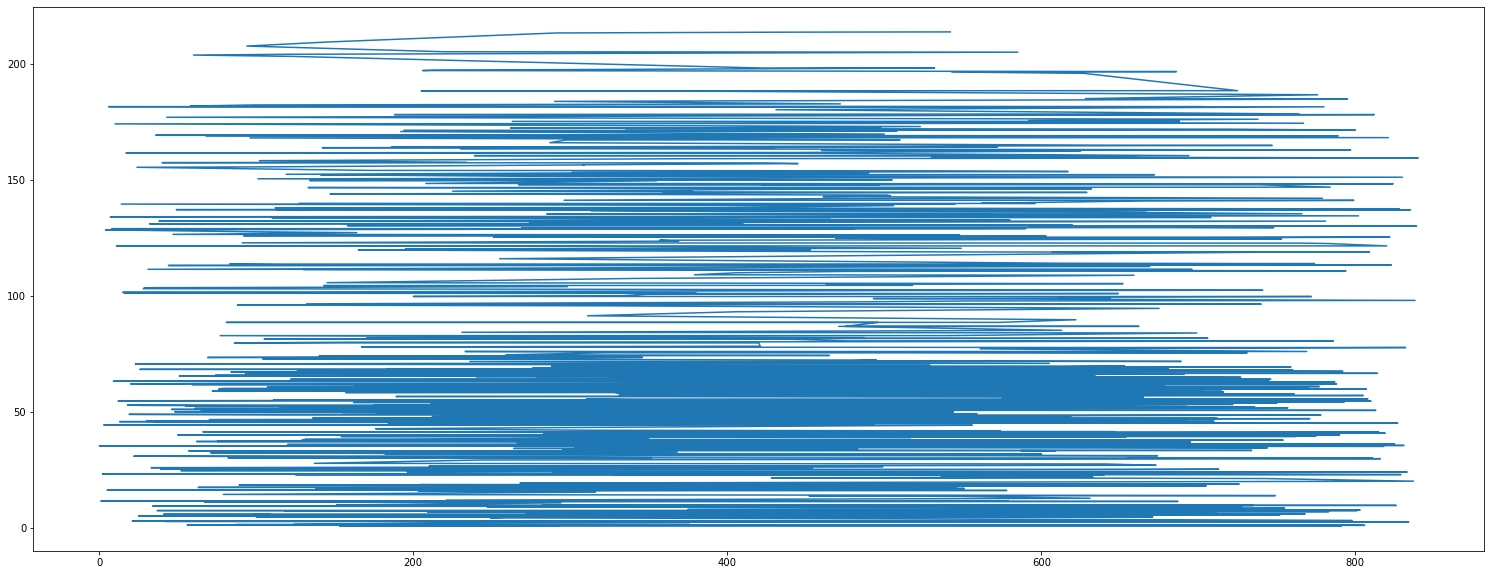

In [294]:
df2['Actual'].plot(figsize=(26,10))
#df2['SGD'].plot(figsize=(26,10))


<AxesSubplot:>

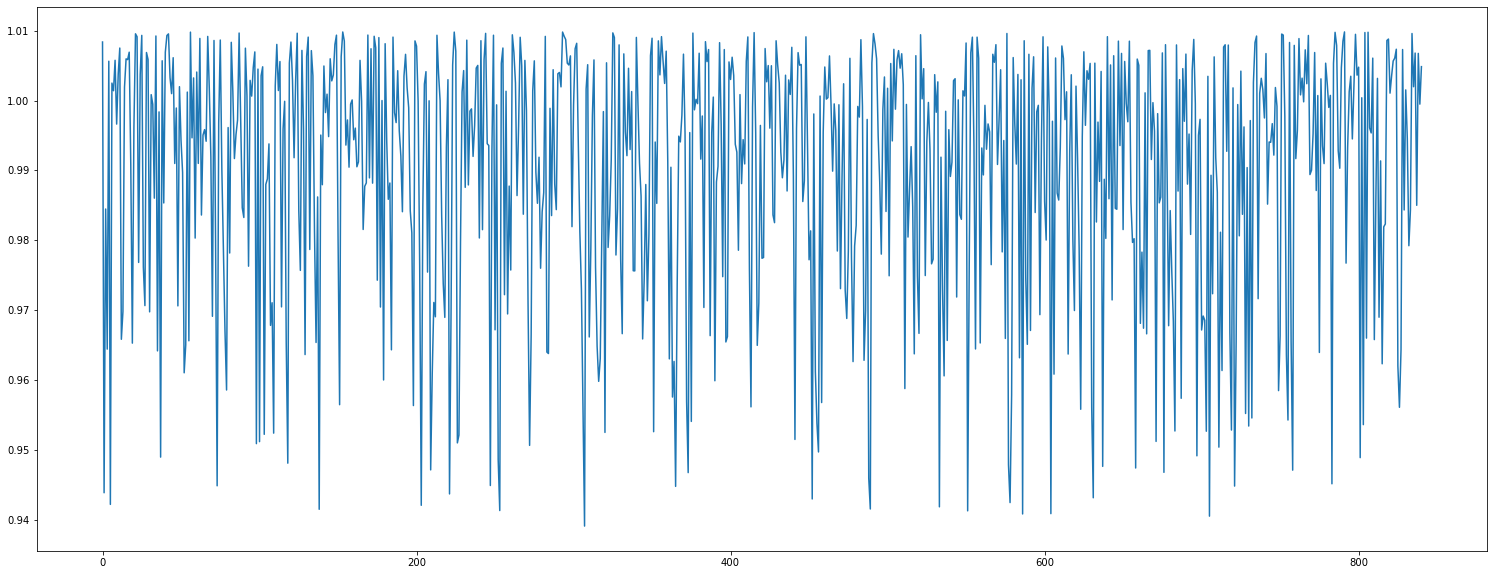

In [280]:
diffSGD_LR = df2['SGD']/df2['LR']
diffSGD_LR.plot(figsize=(26,10))

In [281]:
diffAct_LR = df2['Actual']/df2['LR']
diffAct_SGD = df2['Actual']/df2['SGD']

meanVal = (df2['LR']+df2['SGD'])/2
diffMeanAct = df2['Actual']/meanVal


<AxesSubplot:>

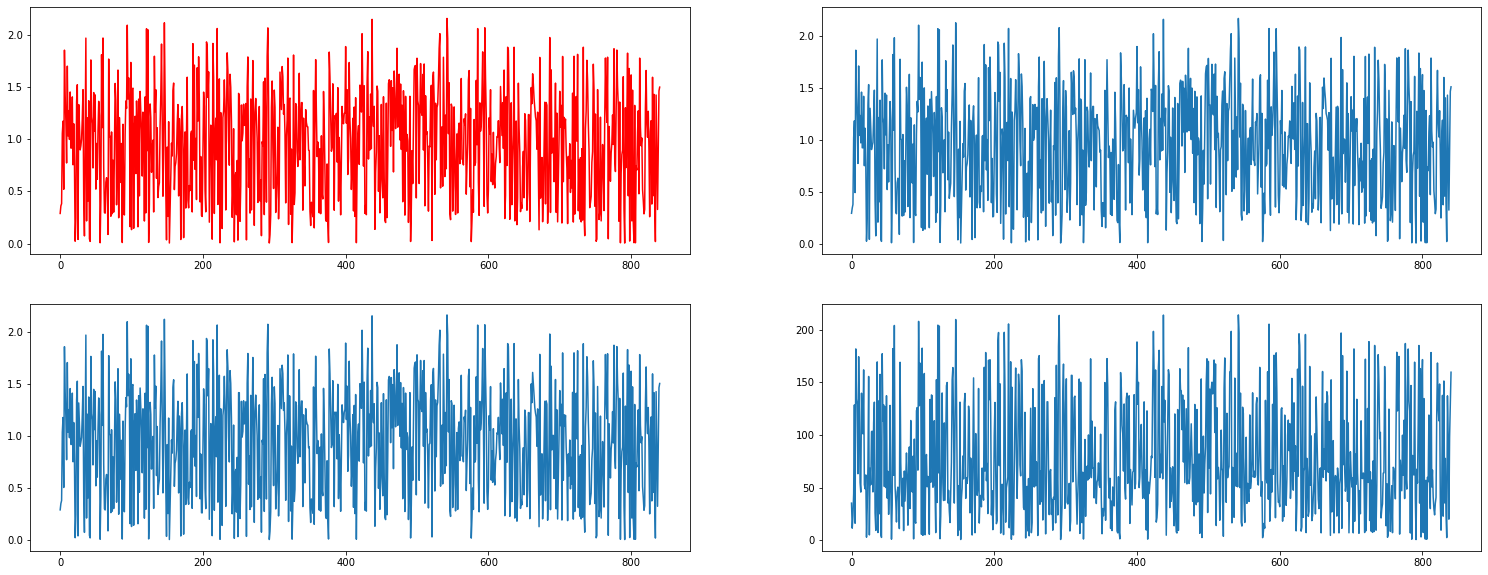

In [282]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0,0])
diffAct_LR.plot(figsize=(26,10), ax=axes[0,1])
diffMeanAct.plot(figsize=(26,10), ax=axes[1,0])
df2['Actual'].plot(figsize=(26,10), ax=axes[1,1])

## Predict todays closing price by giving todays opening price

In [283]:
#predicts the price according to the selected algorithm
def predictPrice(opening, algorithm):
    prediction = algorithm.predict(opening)
    return prediction

In [284]:
from pandas import DataFrame
#from statistics import mean

def assessDifference(opening, *argv, closing): #The args are the prediction algorithms you want to test on
    opPrice=pd.DataFrame([[opening]])
    opPrice=scaler.transform(opPrice)
    i=0
    predList = []
    for model in argv:
        prediction = predictPrice(opPrice, model)
        print("Model " +str(model) + ": "+ str(prediction), end=" ")
        predList.append(prediction)
        print(f'The prediction is off by {float(closing-prediction)} NOK')
        i+=1
    
    print(f'The mean of the models is {float(findMean(predList))} NOK')

    print(f'The mean of the models are off by {findMeanDifference(closing, predList)} NOK')

def findMean(predictionList):
    return sum(predictionList)/len(predictionList)
    
def findMeanDifference(closing, predictionList):
    return float(closing-findMean(predictionList))

        

In [285]:
list = assessDifference(0.7090, regressor, sgd, DTreeModel, closing=0.6768)

Model LinearRegression(): [31.76682937] The prediction is off by -31.090029367886025 NOK
Model SGDRegressor(): [29.83083488] The prediction is off by -29.154034877339264 NOK
Model DecisionTreeRegressor(max_depth=100): [19.139799] The prediction is off by -18.462999 NOK
The mean of the models is 26.912487748408427 NOK
The mean of the models are off by -26.235687748408427 NOK


In [315]:
assessDifference(6150, regressor, sgd, DTreeModel, closing=0.6722)

Model LinearRegression(): [128.52790688] The prediction is off by -127.85570687818748 NOK
Model SGDRegressor(): [127.32615942] The prediction is off by -126.65395941774577 NOK
Model DecisionTreeRegressor(max_depth=100): [0.605] The prediction is off by 0.06720000000000004 NOK
The mean of the models is 85.48635543197776 NOK
The mean of the models are off by -84.81415543197775 NOK


## Calculating accuracy

How percentually correct is the prediction.

In [ ]:
(actual-predicted)/actual * 100

How often does it correctly asess whether the price will go up or down by closing time, in comparison to the opening time.

In [ ]:
total = 0
correct = 0
for x : df
    
    if y > x && 
